In [ ]:
# 547 Final Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

In [ ]:
import os

In [ ]:
# Load Data
df_origin = pd.read_csv('secondary_data.csv', delimiter= ';')
df = df_origin.copy()
df.sample(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
12448,e,1.30,x,t,y,f,d,NaN,w,5.65,...,NaN,t,y,NaN,NaN,f,f,NaN,g,a
53678,p,19.45,s,s,n,f,d,c,y,7.73,...,NaN,k,n,NaN,NaN,f,f,NaN,d,u
40005,p,2.92,c,NaN,w,f,a,c,w,3.66,...,NaN,i,u,NaN,NaN,f,f,NaN,p,a
25191,e,15.83,x,t,k,f,a,d,k,7.29,...,NaN,NaN,w,NaN,NaN,f,f,w,d,a
48775,e,11.76,x,h,n,t,p,NaN,y,6.90,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
56256,p,7.43,o,t,r,f,NaN,c,y,1.58,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,w
12000,e,0.81,x,g,e,t,a,NaN,p,4.92,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
50842,p,7.38,x,NaN,n,f,p,NaN,w,11.48,...,c,NaN,n,NaN,NaN,f,f,p,d,a
28925,p,7.52,f,d,e,t,d,c,w,6.70,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
46659,e,3.77,f,h,n,f,NaN,c,k,5.69,...,NaN,s,w,NaN,w,f,f,k,d,u


In [ ]:
# Create dummy variable (since categorical variables)
# Splite the featuers and target in two variables.
X = df.drop('class', axis=1)
y = df['class']

# For the sake of visualization, return it by hot-encoding.
y = y.map({'p': 'Posionous', 'e': 'Edible'})

# Get dummy variables for each column in X.
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.sample(5)

print('Number of columns generated from dummy variables =', len(X_dummy.columns.values),'Columns')

Number of columns generated from dummy variables = 102 Columns


In [ ]:
# dimensional reduction -- pca
# step1: standardize data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_dummy)
X_std

array([[ 1.61946181,  3.07670468,  0.492293  , ..., -0.21619812,
        -0.77451888,  3.25494177],
       [ 1.87398231,  3.385311  ,  0.60189981, ..., -0.21619812,
         1.29112412, -0.30722516],
       [ 1.39343241,  3.328931  ,  0.55706066, ..., -0.21619812,
        -0.77451888,  3.25494177],
       ...,
       [-1.03780819, -0.80758069, -0.57587517, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.04350641, -0.89660175, -0.66854275, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.05680226, -0.98859017, -0.66754632, ..., -0.21619812,
         1.29112412, -0.30722516]])

In [ ]:
# step2: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

print('Original Number of features =',  X_dummy.shape[1] ,'columns')
print('Reduced Number of features =', X_pca.shape[1], 'columns')

Original Number of features = 102 columns
Reduced Number of features = 5 columns


In [ ]:
round(sum(list(pca.explained_variance_ratio_))*100, 2) # variance explain for pca, it is pretty low

17.6

In [ ]:
# pca result is not good, try to calculate how much variable needed to capture 93%
pca = PCA(n_components=0.93, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X_std)
# Show the result
print('Original number of features:', X_dummy.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 102
Reduced number of features: 73


In [ ]:
# we need 73 variable to capture 93%, which is a lot. We might try other dimensional reduction method
# use t-SNE,
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
X_tsne = tsne.fit_transform(X_std)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


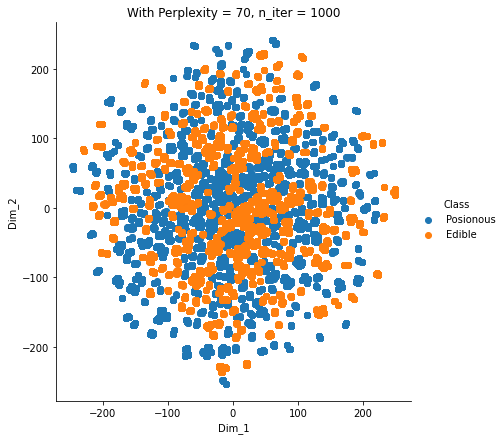

In [ ]:
# Create a dataframe to plot
tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(data=tsne_data, columns=['Dim_1', 'Dim_2', 'Class'])

# Plot the dataframe
sns.FacetGrid(data=df_tsne, hue='Class', size=6)\
   .map(plt.scatter, 'Dim_1', 'Dim_2')\
   .add_legend()
plt.title('With Perplexity = 70, n_iter = 1000');


In [ ]:
# Train the model
# label encode the class column
y = y.map({'Posionous':1, 'Edible':0})
y.value_counts()


1    33888
0    27181
Name: class, dtype: int64

In [ ]:
# methods import
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
MLA = [
    # Ensemble Methods
    ensemble.RandomForestClassifier(),


    # GLM
    linear_model.LogisticRegressionCV(),

    # Naives Bayes
    naive_bayes.BernoulliNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),

    # Trees
    tree.DecisionTreeClassifier()
]


In [ ]:
# data split
# Splite dataset in cross-validation with this splitter class:
# NOTE: this is an alternative to train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

# Run the model 10x with 60/30 split intentionally leaving out 10% of the data
cv_split = ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

# Create table to compare MLA metrices
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Test Accuracy Mean',
               'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Create table to compare MLA Predictions
MLA_predict = {}

In [ ]:
# build
for row_idx, alg in enumerate(MLA):
    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_idx, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_idx, 'MLA Parameters'] = str(alg.get_params())

    # Score model with cross validation
    cv_results = cross_validate(alg, X_pca, y.astype('int'), cv=cv_split)
    MLA_compare.loc[row_idx, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare.loc[row_idx, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_idx, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

    # If this is a non-bias random sample, then +/-3 standard deviations from the mean
    # should statistically capture 99.7% of the subsets.
    MLA_compare.loc[row_idx, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    # Save MLA predictions
    alg.fit(X_pca, y.astype('int'))
    MLA_predict[MLA_name] = alg.predict(X_pca)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Print and Sort table.
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False,
                       inplace=True)
MLA_compare

NameError: ignored

In [ ]:
plt.figure(figsize=(16, 8))
base_color = sns.color_palette()[1]
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color=base_color)
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm Name')
mlt.rc('ytick', labelsize=14)